# WeatherPy - Analysis

**Max temperature is higher near equator (-20 t0 + 40 degree latitude) at this time of year  

**Southern hemisphere is more cooler this time of the year  

**In most of the cities, the windspeed is between 0 - 10 mph  

**Humidity doens't seem to have any correlation with Latitude  

**Sky is mostly clear this time of the year and doesn't seem to have any correlation with Latitude.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import os, datetime

# Dependencies in case you want to use openwathermapy api wrapper
#import openweathermapy.core as owm

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

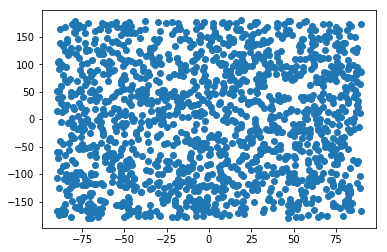

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
countrycode =[]

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)


# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
        
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        
        
# Print the city count to confirm sufficient count
len(cities)
plt.scatter(lats,lngs)




## Perform API Calls

In [3]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

#sample url and query to get the json details to find the variables we need for success response
response = requests.get('http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=' + api_key +'&q=Paris').json()
print(response)
unix_timestam = response['dt']

print(datetime.datetime.fromtimestamp(unix_timestam).strftime("%B %d, %Y"))

#sample url and query to get the json details to find the variables we need for failure response
response = requests.get('http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=' + api_key +'&q=Kishore').json()
print(response)



{'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'dt': 1532415600, 'sys': {'message': 0.0046, 'type': 1, 'sunset': 1532461183, 'country': 'FR', 'id': 5617, 'sunrise': 1532405624}, 'id': 2988507, 'base': 'stations', 'cod': 200, 'coord': {'lon': 2.35, 'lat': 48.86}, 'visibility': 10000, 'clouds': {'all': 0}, 'main': {'temp': 71.58, 'humidity': 64, 'pressure': 1015, 'temp_max': 75.2, 'temp_min': 66.2}, 'wind': {'deg': 20, 'speed': 3.36}, 'name': 'Paris'}
July 24, 2018
{'message': 'city not found', 'cod': '404'}


In [4]:
# set up lists to hold reponse info

lat = []
lon = []
temp = []
humidity = []
cloudiness=[]
windspeed=[]
foundcity =[]
foundcityID = []
dt =[]
cc = []

baseurl = 'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=' + api_key +'&q='
recordcount = 0

# Header for log file
print("------------------------------")
print("Begin Data Retreival")
print("------------------------------")

# Loop through the list of cities and perform a request for data on each. Display message if city is not found. 
for city in cities:
    response = requests.get(baseurl + city).json()
    recordcount += 1
    print("Processing Record: " + str(recordcount) + " | " + city)
    print(baseurl + city)
    if(response['cod'] == 200):
        print("api call successful")
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        windspeed.append(response['wind']['speed'])
        cloudiness.append(response['clouds']['all'])
        foundcity.append(city)
        foundcityID.append(response['id'])
        cc.append(response['sys']['country'])
        dt.append(datetime.datetime.fromtimestamp(response['dt']).strftime("%B %d, %Y"))
        
    else:
        print("api call failed")
        print("Response code: " + str(response['cod']) + " Response Message: " + response['message'])
        
date = datetime.datetime.fromtimestamp(response['dt']).strftime("%B %d, %Y")
# Trailer for Log file
print("-------------------------------")
print("End Data Retreival")
print("-------------------------------")


    


------------------------------
Begin Data Retreival
------------------------------
Processing Record: 1 | port alfred
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d644e1dac86227a5e3f63a0ae8309fc6&q=port alfred
api call successful
Processing Record: 2 | esperance
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d644e1dac86227a5e3f63a0ae8309fc6&q=esperance
api call successful
Processing Record: 3 | port-cartier
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d644e1dac86227a5e3f63a0ae8309fc6&q=port-cartier
api call successful
Processing Record: 4 | terrace
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d644e1dac86227a5e3f63a0ae8309fc6&q=terrace
api call successful
Processing Record: 5 | mys shmidta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d644e1dac86227a5e3f63a0ae8309fc6&q=mys shmidta
api call failed
Response code: 404 Response Message: city not found
Processing Record: 6 | tilich

Processing Record: 49 | arkhangelsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d644e1dac86227a5e3f63a0ae8309fc6&q=arkhangelsk
api call successful
Processing Record: 50 | ushuaia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d644e1dac86227a5e3f63a0ae8309fc6&q=ushuaia
api call successful
Processing Record: 51 | berlevag
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d644e1dac86227a5e3f63a0ae8309fc6&q=berlevag
api call successful
Processing Record: 52 | kavaratti
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d644e1dac86227a5e3f63a0ae8309fc6&q=kavaratti
api call successful
Processing Record: 53 | anar darreh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d644e1dac86227a5e3f63a0ae8309fc6&q=anar darreh
api call failed
Response code: 404 Response Message: city not found
Processing Record: 54 | mayumba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d644e1dac86227a

Processing Record: 97 | mamontovo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d644e1dac86227a5e3f63a0ae8309fc6&q=mamontovo
api call successful
Processing Record: 98 | jaffna
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d644e1dac86227a5e3f63a0ae8309fc6&q=jaffna
api call successful
Processing Record: 99 | palmer
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d644e1dac86227a5e3f63a0ae8309fc6&q=palmer
api call successful
Processing Record: 100 | saskylakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d644e1dac86227a5e3f63a0ae8309fc6&q=saskylakh
api call successful
Processing Record: 101 | barentsburg
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d644e1dac86227a5e3f63a0ae8309fc6&q=barentsburg
api call failed
Response code: 404 Response Message: city not found
Processing Record: 102 | khatanga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d644e1dac86227a5e3f63

Processing Record: 145 | longyearbyen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d644e1dac86227a5e3f63a0ae8309fc6&q=longyearbyen
api call successful
Processing Record: 146 | galiwinku
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d644e1dac86227a5e3f63a0ae8309fc6&q=galiwinku
api call failed
Response code: 404 Response Message: city not found
Processing Record: 147 | saleaula
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d644e1dac86227a5e3f63a0ae8309fc6&q=saleaula
api call failed
Response code: 404 Response Message: city not found
Processing Record: 148 | castro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d644e1dac86227a5e3f63a0ae8309fc6&q=castro
api call successful
Processing Record: 149 | luderitz
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d644e1dac86227a5e3f63a0ae8309fc6&q=luderitz
api call successful
Processing Record: 150 | tasiilaq
http://api.openweathermap.org/data

Processing Record: 193 | upata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d644e1dac86227a5e3f63a0ae8309fc6&q=upata
api call successful
Processing Record: 194 | lashio
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d644e1dac86227a5e3f63a0ae8309fc6&q=lashio
api call successful
Processing Record: 195 | namatanai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d644e1dac86227a5e3f63a0ae8309fc6&q=namatanai
api call successful
Processing Record: 196 | vila
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d644e1dac86227a5e3f63a0ae8309fc6&q=vila
api call successful
Processing Record: 197 | homer
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d644e1dac86227a5e3f63a0ae8309fc6&q=homer
api call successful
Processing Record: 198 | pamatawan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d644e1dac86227a5e3f63a0ae8309fc6&q=pamatawan
api call successful
Processing Record: 199 |

Processing Record: 240 | miragoane
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d644e1dac86227a5e3f63a0ae8309fc6&q=miragoane
api call successful
Processing Record: 241 | chuy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d644e1dac86227a5e3f63a0ae8309fc6&q=chuy
api call successful
Processing Record: 242 | bitung
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d644e1dac86227a5e3f63a0ae8309fc6&q=bitung
api call successful
Processing Record: 243 | nanortalik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d644e1dac86227a5e3f63a0ae8309fc6&q=nanortalik
api call successful
Processing Record: 244 | jamame
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d644e1dac86227a5e3f63a0ae8309fc6&q=jamame
api call successful
Processing Record: 245 | upernavik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d644e1dac86227a5e3f63a0ae8309fc6&q=upernavik
api call successful
Processing R

Processing Record: 288 | trofors
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d644e1dac86227a5e3f63a0ae8309fc6&q=trofors
api call successful
Processing Record: 289 | saint george
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d644e1dac86227a5e3f63a0ae8309fc6&q=saint george
api call successful
Processing Record: 290 | anderson
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d644e1dac86227a5e3f63a0ae8309fc6&q=anderson
api call successful
Processing Record: 291 | sarh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d644e1dac86227a5e3f63a0ae8309fc6&q=sarh
api call successful
Processing Record: 292 | souillac
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d644e1dac86227a5e3f63a0ae8309fc6&q=souillac
api call successful
Processing Record: 293 | atar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d644e1dac86227a5e3f63a0ae8309fc6&q=atar
api call successful
Processing Rec

Processing Record: 336 | ust-barguzin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d644e1dac86227a5e3f63a0ae8309fc6&q=ust-barguzin
api call successful
Processing Record: 337 | eskilstuna
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d644e1dac86227a5e3f63a0ae8309fc6&q=eskilstuna
api call successful
Processing Record: 338 | ust-maya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d644e1dac86227a5e3f63a0ae8309fc6&q=ust-maya
api call successful
Processing Record: 339 | abrau-dyurso
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d644e1dac86227a5e3f63a0ae8309fc6&q=abrau-dyurso
api call successful
Processing Record: 340 | ban phai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d644e1dac86227a5e3f63a0ae8309fc6&q=ban phai
api call successful
Processing Record: 341 | portland
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d644e1dac86227a5e3f63a0ae8309fc6&q=portland
api 

Processing Record: 386 | jalalabad
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d644e1dac86227a5e3f63a0ae8309fc6&q=jalalabad
api call successful
Processing Record: 387 | attawapiskat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d644e1dac86227a5e3f63a0ae8309fc6&q=attawapiskat
api call failed
Response code: 404 Response Message: city not found
Processing Record: 388 | dalbandin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d644e1dac86227a5e3f63a0ae8309fc6&q=dalbandin
api call successful
Processing Record: 389 | pemangkat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d644e1dac86227a5e3f63a0ae8309fc6&q=pemangkat
api call failed
Response code: 404 Response Message: city not found
Processing Record: 390 | te anau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d644e1dac86227a5e3f63a0ae8309fc6&q=te anau
api call successful
Processing Record: 391 | kilrush
http://api.openweathermap.org

Processing Record: 433 | mirnyy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d644e1dac86227a5e3f63a0ae8309fc6&q=mirnyy
api call successful
Processing Record: 434 | iqaluit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d644e1dac86227a5e3f63a0ae8309fc6&q=iqaluit
api call successful
Processing Record: 435 | peleduy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d644e1dac86227a5e3f63a0ae8309fc6&q=peleduy
api call successful
Processing Record: 436 | riberalta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d644e1dac86227a5e3f63a0ae8309fc6&q=riberalta
api call successful
Processing Record: 437 | kyabe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d644e1dac86227a5e3f63a0ae8309fc6&q=kyabe
api call successful
Processing Record: 438 | evensk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d644e1dac86227a5e3f63a0ae8309fc6&q=evensk
api call successful
Processing Record: 4

Processing Record: 481 | vicente guerrero
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d644e1dac86227a5e3f63a0ae8309fc6&q=vicente guerrero
api call successful
Processing Record: 482 | humberto de campos
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d644e1dac86227a5e3f63a0ae8309fc6&q=humberto de campos
api call successful
Processing Record: 483 | kaeo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d644e1dac86227a5e3f63a0ae8309fc6&q=kaeo
api call successful
Processing Record: 484 | sayaxche
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d644e1dac86227a5e3f63a0ae8309fc6&q=sayaxche
api call successful
Processing Record: 485 | douentza
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d644e1dac86227a5e3f63a0ae8309fc6&q=douentza
api call successful
Processing Record: 486 | jiddah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d644e1dac86227a5e3f63a0ae8309fc6&q=jiddah


Processing Record: 529 | bonavista
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d644e1dac86227a5e3f63a0ae8309fc6&q=bonavista
api call successful
Processing Record: 530 | zelenogorskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d644e1dac86227a5e3f63a0ae8309fc6&q=zelenogorskiy
api call successful
Processing Record: 531 | eureka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d644e1dac86227a5e3f63a0ae8309fc6&q=eureka
api call successful
Processing Record: 532 | byron bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d644e1dac86227a5e3f63a0ae8309fc6&q=byron bay
api call successful
Processing Record: 533 | vila velha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d644e1dac86227a5e3f63a0ae8309fc6&q=vila velha
api call successful
Processing Record: 534 | hvolsvollur
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d644e1dac86227a5e3f63a0ae8309fc6&q=hvolsvollur
api 

Processing Record: 577 | yuzhno-kurilsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d644e1dac86227a5e3f63a0ae8309fc6&q=yuzhno-kurilsk
api call successful
Processing Record: 578 | hanna
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d644e1dac86227a5e3f63a0ae8309fc6&q=hanna
api call successful
Processing Record: 579 | esna
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d644e1dac86227a5e3f63a0ae8309fc6&q=esna
api call successful
Processing Record: 580 | visby
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d644e1dac86227a5e3f63a0ae8309fc6&q=visby
api call successful
Processing Record: 581 | banovce
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d644e1dac86227a5e3f63a0ae8309fc6&q=banovce
api call failed
Response code: 404 Response Message: city not found
Processing Record: 582 | manta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d644e1dac86227a5e3f63a0ae8309fc6&

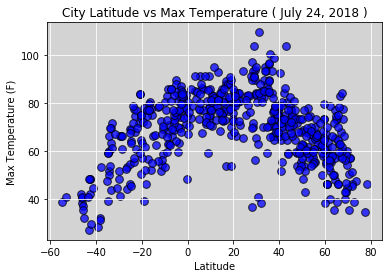

In [5]:
fig, ax = plt.subplots()
ax.scatter(lat,temp,alpha=0.75,marker="o",s=60,edgecolors = 'black',color = 'blue' , label = 'Cities')
# Incorporate the other graph properties
ax.set_xlabel('Latitude')
ax.set_ylabel('Max Temperature (F)')
ax.set_title('City Latitude vs Max Temperature ( ' + date + ' )')
ax.grid(True,color='w')
ax.set_facecolor('lightgrey')
# Save Figure
plt.savefig("City Latitude vs Max Temperature.png")

plt.show()

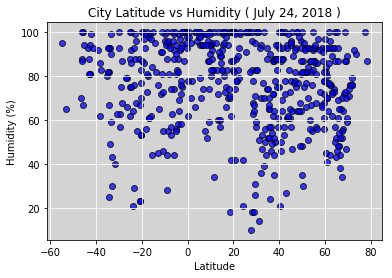

In [6]:
fig, ax = plt.subplots()
ax.scatter(lat,humidity,alpha=0.75,marker="o",edgecolors = 'black',color = 'blue' , label = 'Cities')
# Incorporate the other graph properties
ax.set_xlabel('Latitude')
ax.set_ylabel('Humidity (%)')
ax.set_title('City Latitude vs Humidity ( ' + date + ' )')
ax.grid(True,color='w')
ax.set_facecolor('lightgrey')
# Save Figure
plt.savefig("City Latitude vs Humidity.png")
plt.show()

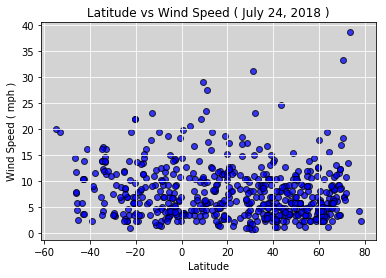

In [7]:
fig, ax = plt.subplots()
ax.scatter(lat,windspeed,alpha=0.75,marker="o",edgecolors = 'black',color = 'blue' , label = 'Cities')
# Incorporate the other graph properties
ax.set_xlabel('Latitude')
ax.set_ylabel('Wind Speed ( mph )')
ax.set_title('Latitude vs Wind Speed ( ' + date + ' )' )
ax.grid(True,color='w')
ax.set_facecolor('lightgrey')
# Save Figure
plt.savefig("Latitude vs Wind Speed.png")

plt.show()

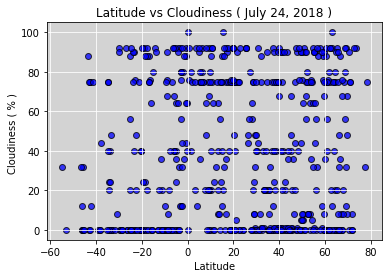

In [8]:
fig, ax = plt.subplots()
ax.scatter(lat,cloudiness,alpha=0.75,marker="o",edgecolors = 'black',color = 'blue' , label = 'Cities')
# Incorporate the other graph properties
ax.set_xlabel('Latitude')
ax.set_ylabel('Cloudiness ( % ) ')
ax.set_title('Latitude vs Cloudiness ( ' + date + ' )')
ax.grid(True,color='w')
ax.set_facecolor('lightgrey')
# Save Figure
plt.savefig("Latitude vs Cloudiness.png")

plt.show()

In [10]:
weatherinfo = {'City ID' : foundcityID, 'City': foundcity, 'Country': cc,
               'Latitude': lat , 'Longitude' : lon,
               'Max Temperature': temp, 'Humidity' : humidity, 
               'Cloudiness' : cloudiness, 'Wind Speed' : windspeed,
                'Date' : dt}

df = pd.DataFrame.from_dict(weatherinfo)
df.head()

,City,City ID,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temperature,Wind Speed
0,port alfred,964432,0,ZA,"July 24, 2018",59,-33.59,26.89,69.42,13.56
1,esperance,3573739,20,TT,"July 23, 2018",94,10.24,-61.45,77.00,5.84
2,port-cartier,6111696,90,CA,"July 24, 2018",100,50.03,-66.88,62.60,4.70
3,terrace,6162949,5,CA,"July 24, 2018",55,54.52,-128.61,64.40,3.36
4,tilichiki,2120591,88,RU,"July 24, 2018",84,60.47,166.10,54.66,6.29


In [11]:
df.to_csv(output_data_file,sep=',',index = False)